In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


# Camera calibration

In [2]:
# prepare object points, [0, 0, 0], [1, 0, 0], [2, 0, 0],...,[7, 5, 0]
# why should define such a list? why should it be transposed?
# how does transpose and reshape work?
objp = np.zeros((6*8, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].transpose().reshape(-1, 2)

In [3]:
# arrays to store object points and image points
objpoints = []
imgpoints = []

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

images = glob.glob("calibration_wide/GOPR00*.jpg")
for frame in images:
    img = cv2.imread(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

    # if found, add object points, image points
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
#         img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
#         plt.imshow(img)
print(len(objpoints))
print(len(imgpoints))

35
35


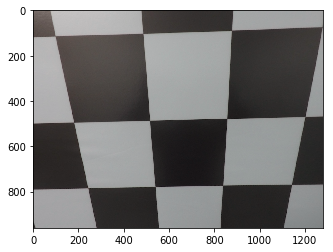

In [4]:
img = cv2.imread("calibration_wide/test_image.jpg")
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

h, w = img.shape[:2]
mtx2, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

# Undistort and Transform

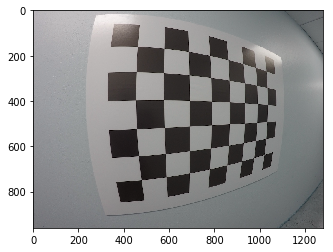

In [5]:
img = cv2.imread("calibration_wide/GOPR0032.jpg")
plt.imshow(img)
nx = 8
ny = 6

In [40]:
def corners_unwarp(img, nx, ny, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
    if ret:
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        src = np.float32([corners[0][0], corners[7][0], corners[47][0], corners[40][0]])
#         print(src)
        dst = np.float32([[100, 100], [1150,100], [1150, 850], [100, 850]])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undist, M, (1280, 960), flags=cv2.INTER_LINEAR)
        
    return undist, warped, M

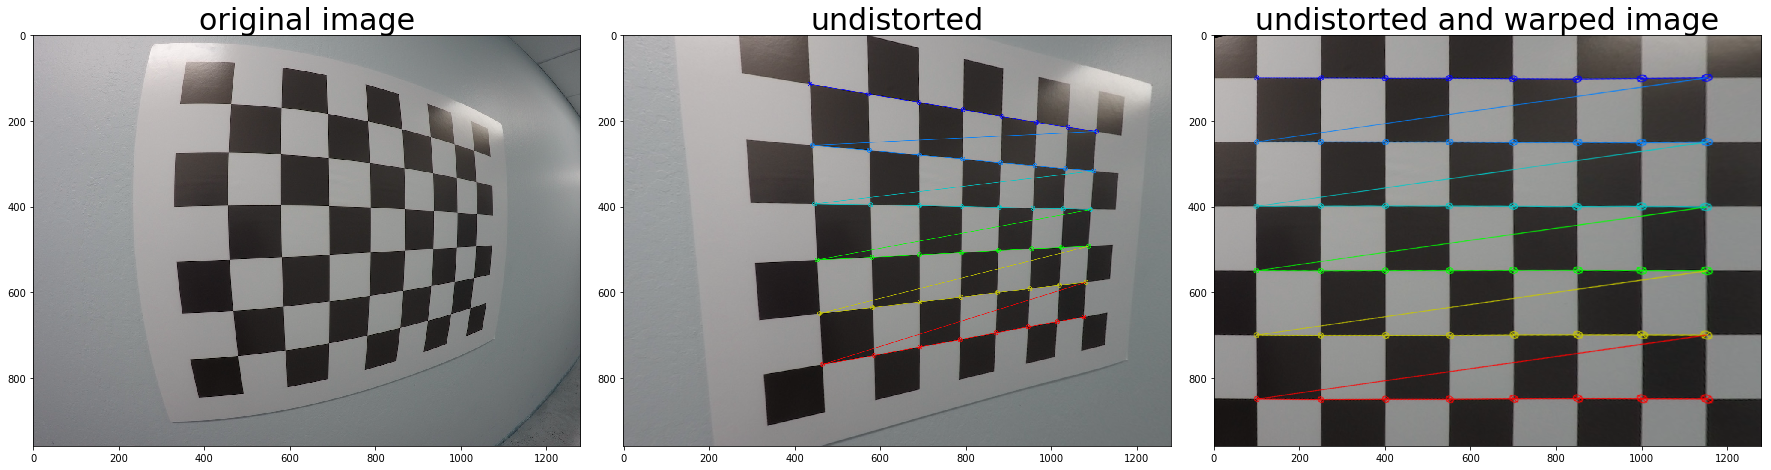

In [42]:
undist, top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('original image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('undistorted', fontsize=30)
ax3.imshow(top_down)
ax3.set_title('undistorted and warped image', fontsize=30)

plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.)

# Sobel